In [5]:
### Save API Token, if needed

%set_env QXToken=db7904a26e50e782a870246662f692fcea1d09ac92184d1a0b2d7e1534d9d1acc4a3d3a8cd461863128b674c7b1186da56341c1cc8c7db12e5a62677294a91b3

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=db7904a26e50e782a870246662f692fcea1d09ac92184d1a0b2d7e1534d9d1acc4a3d3a8cd461863128b674c7b1186da56341c1cc8c7db12e5a62677294a91b3


In [6]:
# qc-grader should be 0.18.11 (or higher)
import qc_grader

qc_grader.__version__

'0.18.12'

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map
from qiskit.quantum_info import SparsePauliOp

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from circuit_knitting.cutting import generate_cutting_experiments, cut_gates

In [8]:
from qc_grader.challenges.iqc_2024 import grade_lab3_ckt_ex1, grade_lab3_ckt_ex2

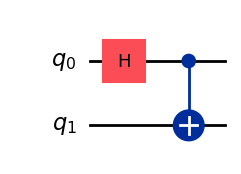

In [9]:
# create a bell pair
bell_state = QuantumCircuit(2)
bell_state.h(0)
bell_state.cx(0,1)
bell_state.draw("mpl")

In [10]:
## If this is your first time accessing the backend
## remove # and fill your API key, and run the code
service = QiskitRuntimeService(
   channel='ibm_quantum',
   instance='ibm-q/open/main',
   token='db7904a26e50e782a870246662f692fcea1d09ac92184d1a0b2d7e1534d9d1acc4a3d3a8cd461863128b674c7b1186da56341c1cc8c7db12e5a62677294a91b3'
)

service = QiskitRuntimeService(channel="ibm_quantum")

# Specify a system to use for transpilation, DO NOT change
backend = service.backend("ibm_kyoto")

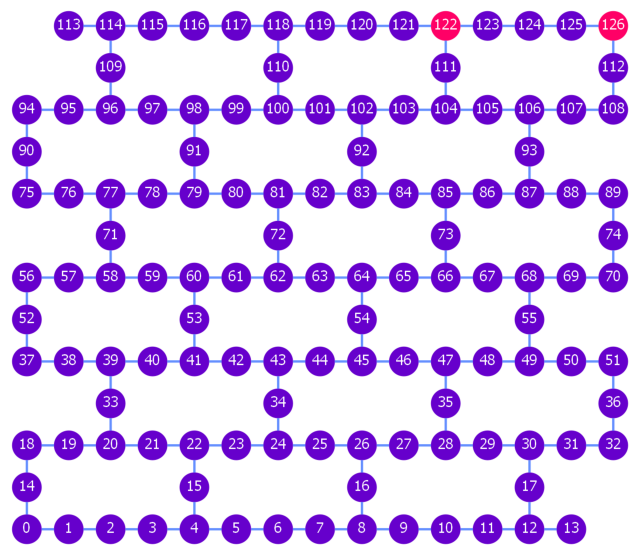

In [11]:
layout=[122, 126]
qubit_color = []
for i in range(127):
    if i in layout:
        qubit_color.append("#ff0066")
    else:
        qubit_color.append("#6600cc")
plot_gate_map(backend, qubit_color=qubit_color, qubit_size=60, font_size=25, figsize=(8,8))

Transpiled circuit depth:  27


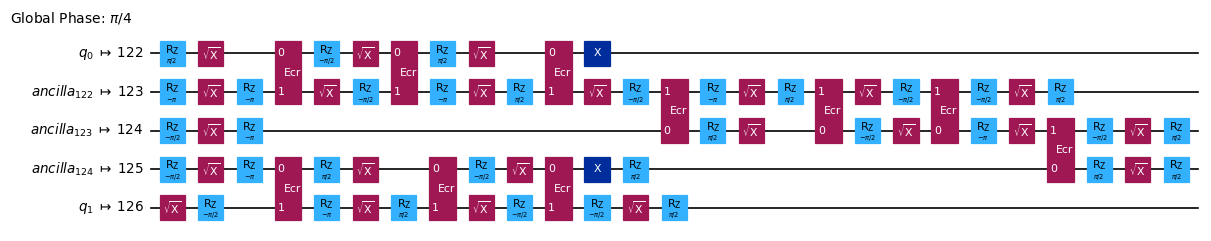

In [12]:
# transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=layout, seed_transpiler=0)
isa_qc = pm.run(bell_state)

# original circuit depth
isa_qc_depth = isa_qc.depth()
print(f"Transpiled circuit depth: ", isa_qc_depth)
isa_qc.draw("mpl", scale=0.6, idle_wires=False, fold=False)

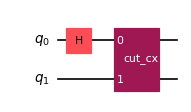

In [13]:
# Find the indices of the distant gates
cut_indices = [
    i
    for i, instruction in enumerate(bell_state.data)
    if {bell_state.find_bit(q)[0] for q in instruction.qubits} == {0, 1}
]

# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit, bases = cut_gates(bell_state, cut_indices)

qpd_circuit.draw("mpl", scale=0.6)

In [14]:
observable = SparsePauliOp(["ZI"])

# Generate the sub-experiments and sampling coefficients
sub_experiments, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit, observables=observable.paulis, num_samples=np.inf
)

Original circuit depth after transpile:  27
QPD sub-experiment depth after transpile:  7
Number of sub-experiments: 6


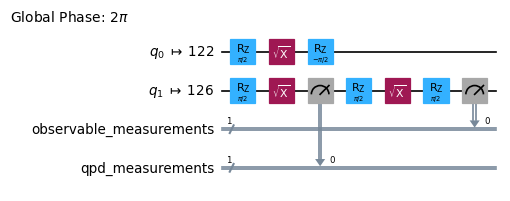

In [15]:
# Transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=layout, seed_transpiler=0)
isa_qpd_circuit = pm.run(sub_experiments[5])

# depth using circuit cutting
isa_qpd_depth = isa_qpd_circuit.depth()

print(f"Original circuit depth after transpile: ", isa_qc_depth)
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_depth)
print(f"Number of sub-experiments:", len(sub_experiments))
isa_qpd_circuit.draw("mpl", scale=0.6, idle_wires=False, fold=False)

In [16]:
x = np.array([c.depth() for c in pm.run(sub_experiments)])
print(x)

[4 3 3 3 7 7]


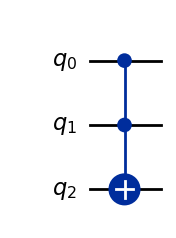

In [17]:

toffoli_layout = [122, 124, 126]

toffoli = QuantumCircuit(3)
toffoli.ccx(0, 1, 2)
toffoli.draw("mpl")

Transpiled circuit depth:  62


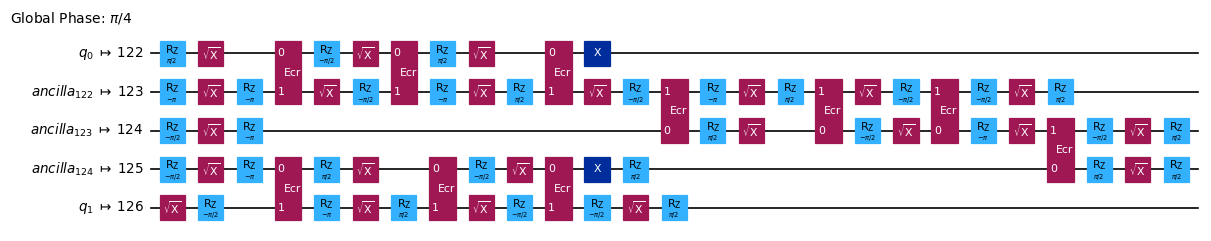

In [103]:
# To know the original circuit depth

### Write your code below here ###
# Transpile the circuit
pm = generate_preset_pass_manager(backend=service.backend("ibm_kyoto"), optimization_level=1, initial_layout=toffoli_layout ,seed_transpiler=0)
isa_toffoli_circuit = pm.run(toffoli)


# Calculate original circuit depth
isa_toffoli_depth = isa_toffoli_circuit.depth()

### Don't change any code past this line ###
print(f"Transpiled circuit depth: ", isa_toffoli_depth)
isa_qc.draw("mpl", scale=0.6, idle_wires=False, fold=False)

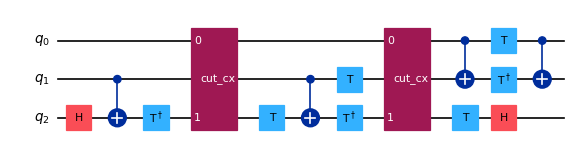

In [104]:
# To know the depth using circuit cutting

# Decompose the toffoli circuit
toffoli_ = toffoli.decompose()

### Write your code below here ###
# Find the indices of the distant gates
gates_connecting_to_cut = {0,2}

cut_indices =[
    i
    for i, instruction in enumerate(toffoli_.data)
    if {toffoli_.find_bit(q)[0] for q in instruction.qubits} == {0, 2}
]

# Decompose distant CNOTs into TwoQubitQPDGate instances

qpd_circuit, bases = cut_gates(toffoli_, cut_indices)


### Don't change any code past this line ###

qpd_circuit.draw("mpl", scale=0.6)

Transpiled circuit depth:  62
QPD sub-experiment depth after transpile:  35
Number of sub-experiments: 36


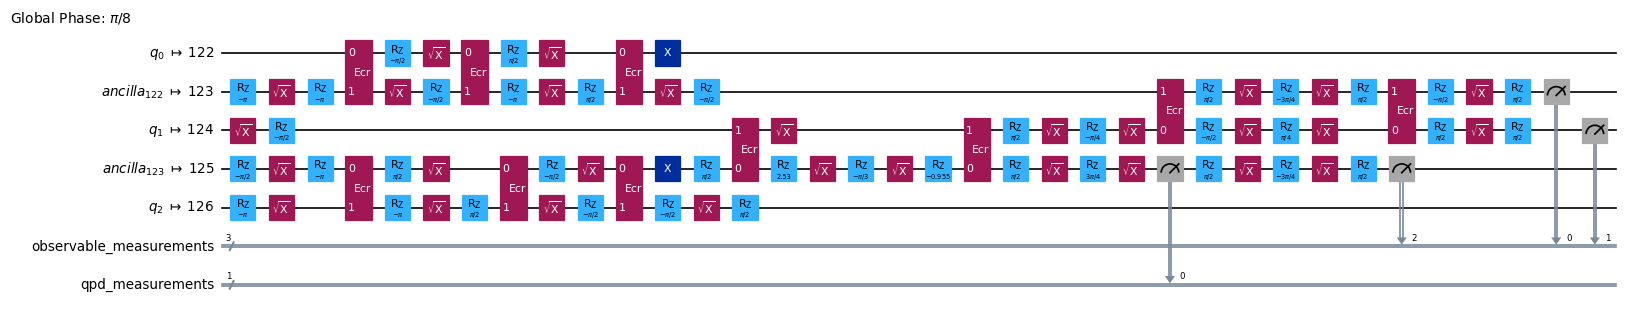

In [152]:
# set the observables
observable = SparsePauliOp(["ZZZ"])

### Write your code below here ###
# Generate the sub-experiments and sampling coefficients
sub_experiments, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
# Note: Use optimization_level=1 and seed_transpiler=0
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=toffoli_layout, seed_transpiler=0 )
isa_qpd_circuit = pm.run(sub_experiments[5])



# Depth using circuit cutting
isa_qpd_toffoli_depth = isa_qpd_circuit.depth()


### Don't change any code past this line ###
print(f"Transpiled circuit depth: ", isa_toffoli_depth)
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_toffoli_depth)
print(f"Number of sub-experiments:", len(sub_experiments))
isa_qpd_circuit.draw("mpl", scale=0.6, idle_wires=False, fold=False)

In [153]:
### Write your code below here ###
# mean of the depth of all sub-experiments
depth_list = np.array([c.depth() for c in pm.run(sub_experiments)])
print(depth_list)
# isa_qpd_toffoli_depth_mean =

### Don't change any code past this line ###
# print(isa_qpd_toffoli_depth_mean)

[35 35 35 35 35 35 35 35 35 35 35 35 32 32 32 32 32 32 32 32 32 32 32 32
 39 39 39 39 39 39 39 39 39 39 39 39]


In [154]:

# Submit your answer using following code
grade_lab3_ckt_ex1(gates_connecting_to_cut, isa_toffoli_depth, depth_list) 
# Expected result type: set, int, numpy.ndarray

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


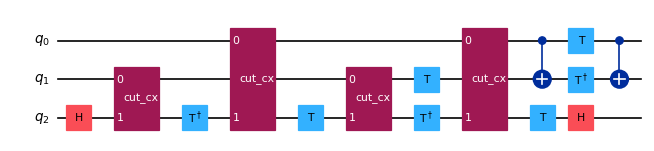

In [158]:
### Write your code below here ###
# Find the indices of the distant gates
gates_connecting_to_cut_1 = {0,2}
gates_connecting_to_cut_2 = {1,2}

cut_indices =[
    i
    for i, instruction in enumerate(toffoli_.data)
    if ({toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut_1
    or {toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut_2)
] 


# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit_2 , bases = cut_gates(toffoli_, cut_indices)
### Don't change any code past this line ###
qpd_circuit_2.draw("mpl", scale=0.6)

QPD sub-experiment depth after transpile:  11
Number of sub-experiments: 1296


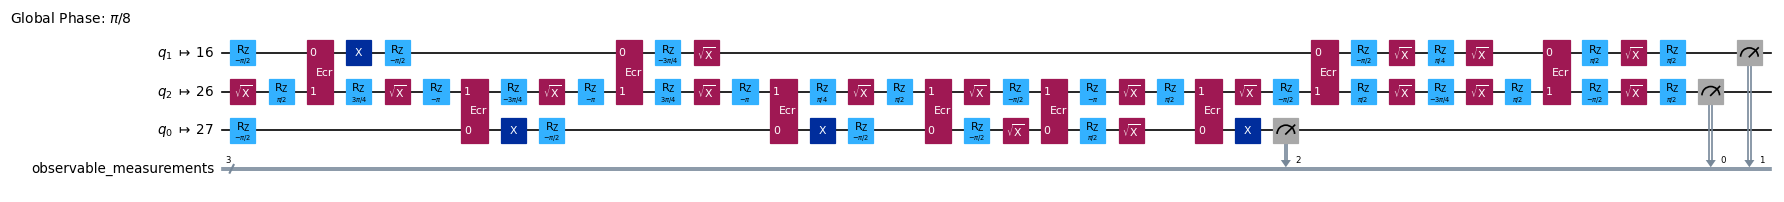

In [159]:
# set the observables
observable = SparsePauliOp(["ZZZ"])

### Write your code below here ###
# Generate the sub-experiments and sampling coefficients

sub_experiments_2, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit_2, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
pm=generate_preset_pass_manager(optimization_level=1,seed_transpiler=0,backend=backend)
# Note: Use optimization_level=1 and seed_transpiler=0



# Depth using circuit cutting
isa_qpd_toffoli_depth_2 =qpd_circuit_2.depth()


### Don't change any code past this line ###
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_toffoli_depth_2)
print(f"Number of sub-experiments:", len(sub_experiments_2))
isa_qpd_circuit_2.draw("mpl", scale=0.6, idle_wires=False, fold=False)

In [160]:
grade_lab3_ckt_ex2(gates_connecting_to_cut_1, gates_connecting_to_cut_2, sub_experiments_2) 

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.
